In [0]:
%matplotlib inline
from fastai.basics import *

In [0]:
# generating random data for linear regression

In [0]:
n=100

In [3]:
x=torch.ones(n,2)
x[:,0].uniform_(-1.,1)
x[:5]

tensor([[ 0.0075,  1.0000],
        [ 0.5707,  1.0000],
        [-0.9360,  1.0000],
        [ 0.6954,  1.0000],
        [-0.2221,  1.0000]])

In [0]:
a=tensor(3.,2);

In [7]:
a

tensor([3., 2.])

In [0]:
y=x@a + torch.rand(n)

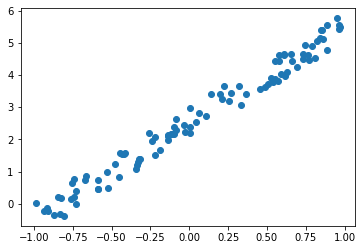

In [9]:
plt.scatter(x[:,0],y)

In [0]:
# defining mean squared error function
def mse (y_hat,y):
  return ((y_hat - y)**2).mean()

In [0]:
a=tensor(-1.,1)

In [13]:
y_hat=x@a
mse(y_hat,y)

tensor(8.4838)

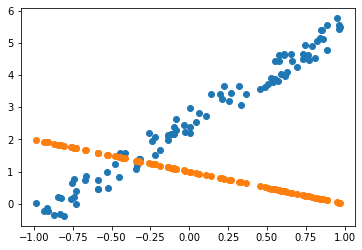

In [14]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],y_hat)

In [0]:
# Now starting code for gradient descent

In [16]:
a = nn.Parameter(a);
a

Parameter containing:
tensor([-1.,  1.], requires_grad=True)

In [0]:
# the GD function
def update():
  y_hat = x@a
  loss=mse(y,y_hat)
  if t%10 ==0: print(loss)
  # for calculating gradient, pytorch has a method called backward
  # when I call backward, the gradient gets stuck inside the attribute .grad
  loss.backward()
  with torch.no_grad():
    a.sub_(lr*a.grad)
    # the underscore indicates we need to update the value of.
    a.grad.zero_()

In [20]:
lr = 1e-1
for t in range(100):
  update()

tensor(8.4838, grad_fn=<MeanBackward0>)
tensor(1.3448, grad_fn=<MeanBackward0>)
tensor(0.3747, grad_fn=<MeanBackward0>)
tensor(0.1480, grad_fn=<MeanBackward0>)
tensor(0.0931, grad_fn=<MeanBackward0>)
tensor(0.0798, grad_fn=<MeanBackward0>)
tensor(0.0766, grad_fn=<MeanBackward0>)
tensor(0.0758, grad_fn=<MeanBackward0>)
tensor(0.0756, grad_fn=<MeanBackward0>)
tensor(0.0756, grad_fn=<MeanBackward0>)


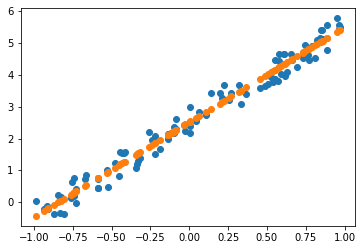

In [22]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],x@a.detach().numpy())

In [0]:
# Now trying to animate the learning process
from matplotlib import animation,rc
rc('animation',html='jshtml')

In [26]:
a = nn.Parameter(tensor(-1.,1))

fig = plt.figure()
plt.scatter(x[:,0], y, c='orange')
line, = plt.plot(x[:,0], x@a.detach().numpy())
plt.close()

def animate(i):
    update()
    line.set_ydata(x@a.detach().numpy())
    return line,

animation.FuncAnimation(fig, animate, np.arange(0, 100), interval=20)